# General Machine Learning - Novice Level

Pick **ONE** task and complete it.

**Tasks:**
1. Linear Regression
2. Classification Problem
3. Clustering

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

## Task 1: Linear Regression

In [2]:
from sklearn.datasets import fetch_california_housing, load_iris

In [3]:
# Load data
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

In [4]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
# Build model
linear_model = LinearRegression()

In [8]:
# Train
linear_model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Visualize results
y_pred = linear_model.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.7317837056903694


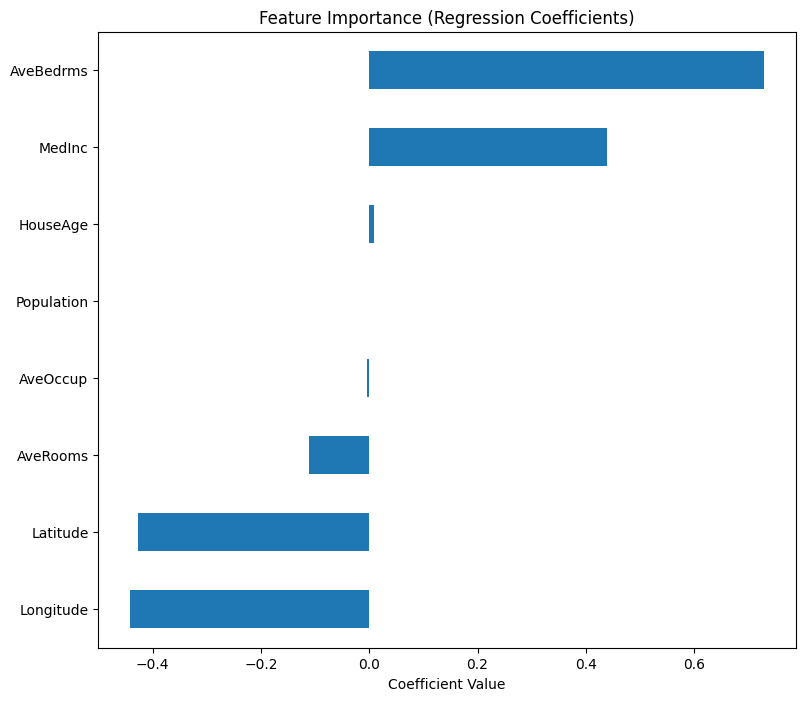

In [10]:
coeefficients = pd.Series(linear_model.coef_, index=X.columns)
coeefficients.sort_values().plot(kind='barh', figsize=(9, 8))
plt.title("Feature Importance (Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()

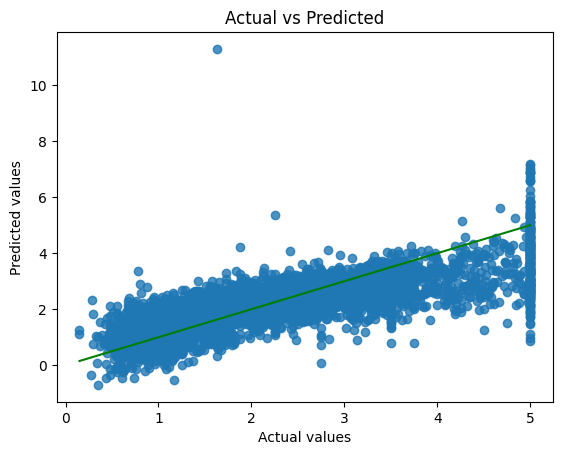

In [11]:
plt.scatter(y_test, y_pred, alpha=.8)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g')
plt.show()

## Task 2: Classification Problem

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [13]:
# Load dataset
X_iris, y_iris = load_iris(as_frame=True, return_X_y=True)

In [14]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris)

In [15]:
# Try classifier 1
rf_clf = RandomForestClassifier()
rf_clf.fit(X_iris_train, y_iris_train)

RandomForestClassifier()

In [16]:
# Try classifier 2
svc = SVC()
svc.fit(X_iris_train, y_iris_train)

SVC()

In [17]:
# Compare results
rf_acc = accuracy_score(y_iris_test, rf_clf.predict(X_iris_test))
svc_acc = accuracy_score(y_iris_test, svc.predict(X_iris_test))
print("SVC accuracy: ", svc_acc)
print("Random Forest Classifier accuracy: ", rf_acc)

SVC accuracy:  0.9736842105263158
Random Forest Classifier accuracy:  0.9736842105263158


## Task 3: Clustering

In [18]:
from sklearn.cluster import KMeans
import seaborn as sns

In [118]:
# Load data
housing = fetch_california_housing(as_frame=True).data
housing = housing[["MedInc", "Latitude", "Longitude"]]
housing

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_preprocessed = housing.copy()
housing_preprocessed["MedInc"] = scaler.fit_transform(housing_preprocessed[["MedInc"]])

In [120]:
# Apply K-means
kmeans = KMeans(n_clusters=6, random_state=3)
labels = kmeans.fit_predict(housing_preprocessed)

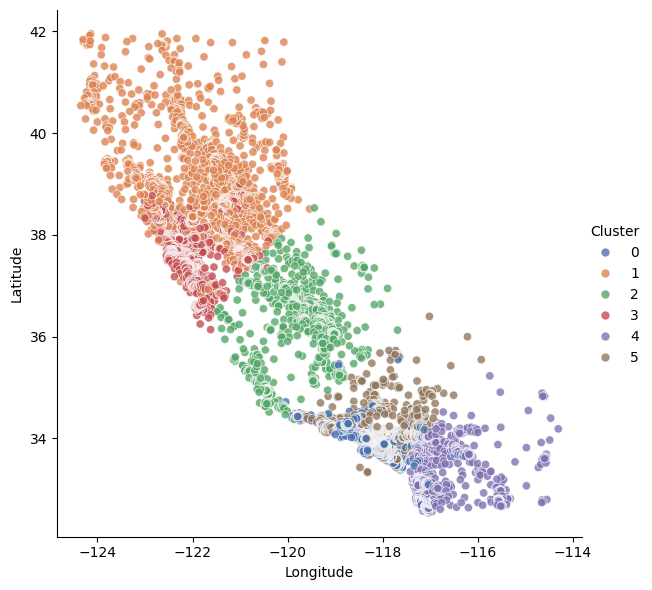

In [122]:
# Visualize clusters
housing_plot = housing.copy()
housing_plot["Cluster"] = labels

sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=housing_plot, height=6, palette='deep', alpha=.8
);

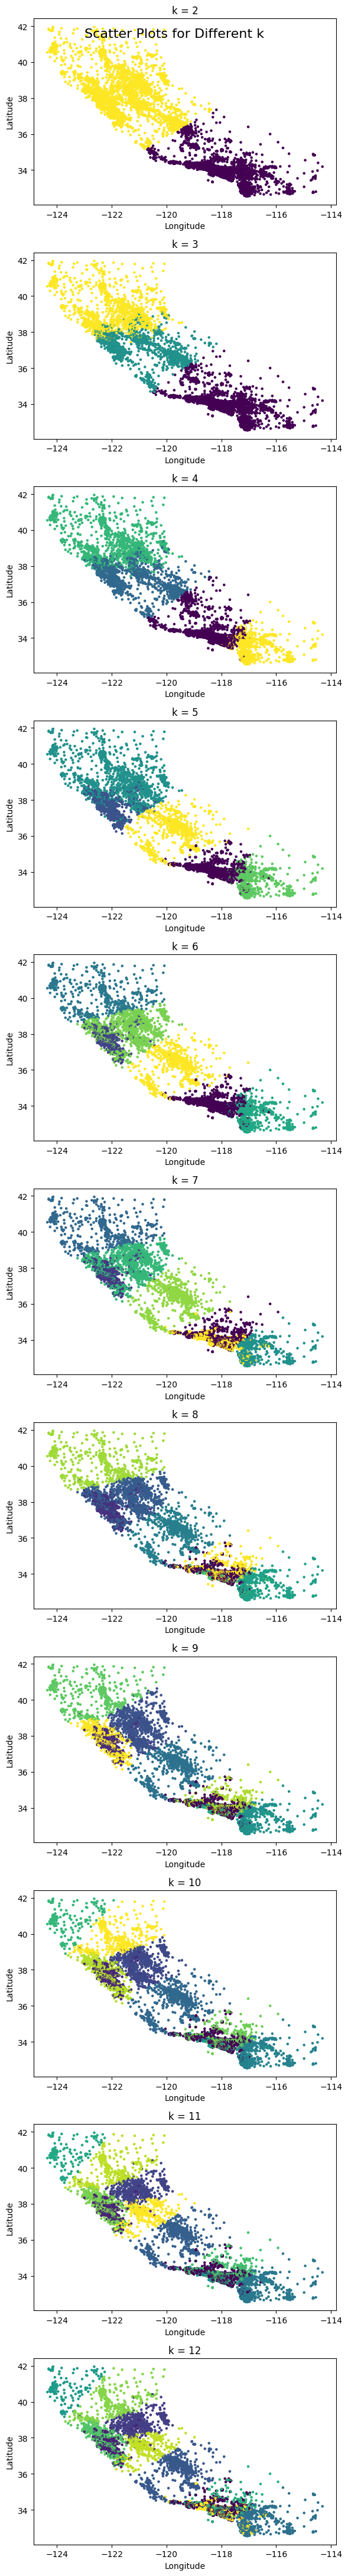

In [124]:
# Find optimal K
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

inertias = []

fig, axes = plt.subplots(len(k_values), 1, figsize=(6, 4 * len(k_values)))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(housing_preprocessed)

    inertias.append(kmeans.inertia_)

    ax = axes[i]
    ax.scatter(housing_preprocessed["Longitude"], housing_preprocessed["Latitude"], c=labels, s=5)
    ax.set_ylabel("Latitude")
    ax.set_xlabel("Longitude")
    ax.set_title(f"k = {k}")

plt.suptitle("Scatter Plots for Different k", fontsize=16)
plt.tight_layout()

plt.show()

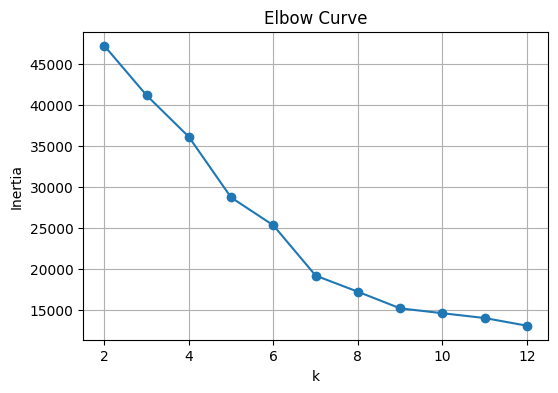

In [125]:
plt.figure(figsize=(6,4))
plt.plot(k_values, inertias, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.grid(True)
plt.show()